<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MOMO_Task-1/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Набор данных**

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.


# **Import библиотек**

In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()


# **Загрузка данных на Google Drive**

In [2]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


# **Считываем файл в DataFrame**

метод .read_csv(path,delimiter) 

In [3]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


# **EDA - Разведывательный анализ данных.**

In [4]:
df.info() # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


Найдем категориальные и численные столбцы

In [5]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


# **Анализ числовых признаков**

In [6]:
df.describe() # выводим информацию о числовых столбцах

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
count,32220.000000,32220.000000,32220.000000,32220.000000,32220.000000,32220.000000
mean,2008.293172,182513.687430,1868.610273,9454.779733,13.706828,14954.229373
std,7.189603,96805.552427,609.781322,9519.612235,7.189603,7337.012277
min,1971.000000,100.000000,200.000000,200.000000,1.000000,100.000000
25%,2005.000000,123000.000000,1500.000000,3599.000000,8.000000,10271.827206
50%,2010.000000,180000.000000,1800.000000,6730.500000,12.000000,14461.538462
75%,2014.000000,237000.000000,2000.000000,12000.000000,17.000000,18888.888889
max,2021.000000,1000000.000000,5000.000000,100000.000000,51.000000,50000.000000


# **Визуализация данных с использованием библиотеки Pandas**



## **Графики для числовых признаков**

Гистограммы

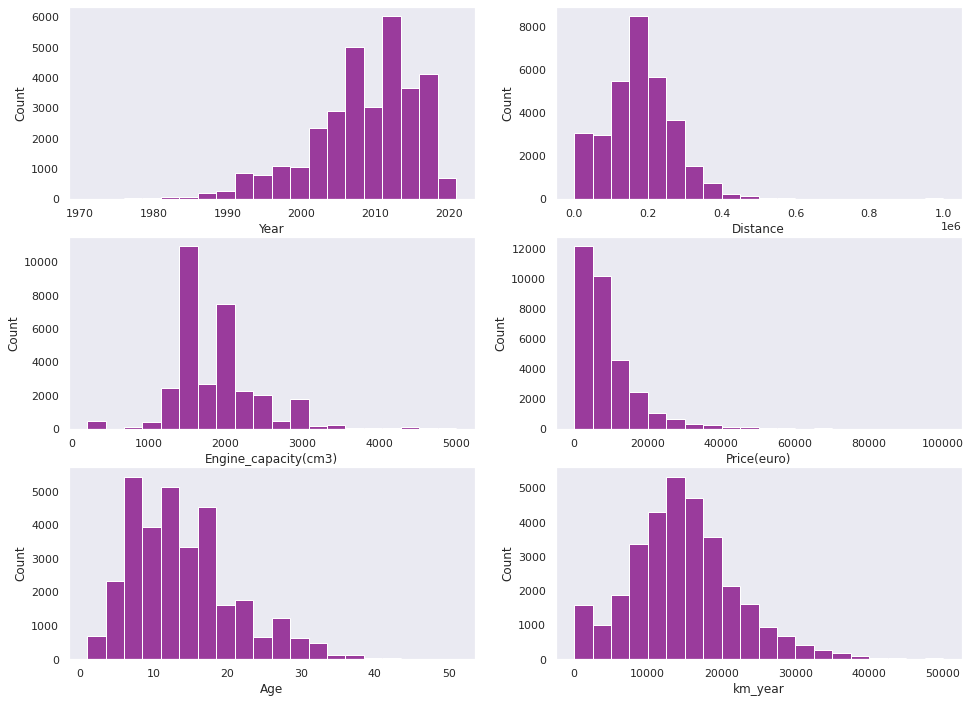

In [7]:
# строим гистограмму для числовых данных
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,12))
sns.set_style('dark')

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20,color = "purple");



Из графиков видно, что выше уровень продаж автомобилей с параметром Age до 20 лет, Distance менее 0.4, Price менее 20 000 euro, km_year менее 20 000, Egine_capacity (cm3) в интервале  от 1 500 до 2 000. 
Значительный рост продаж автомобилей произошел начиная с 2000 года

<Figure size 1080x1080 with 0 Axes>

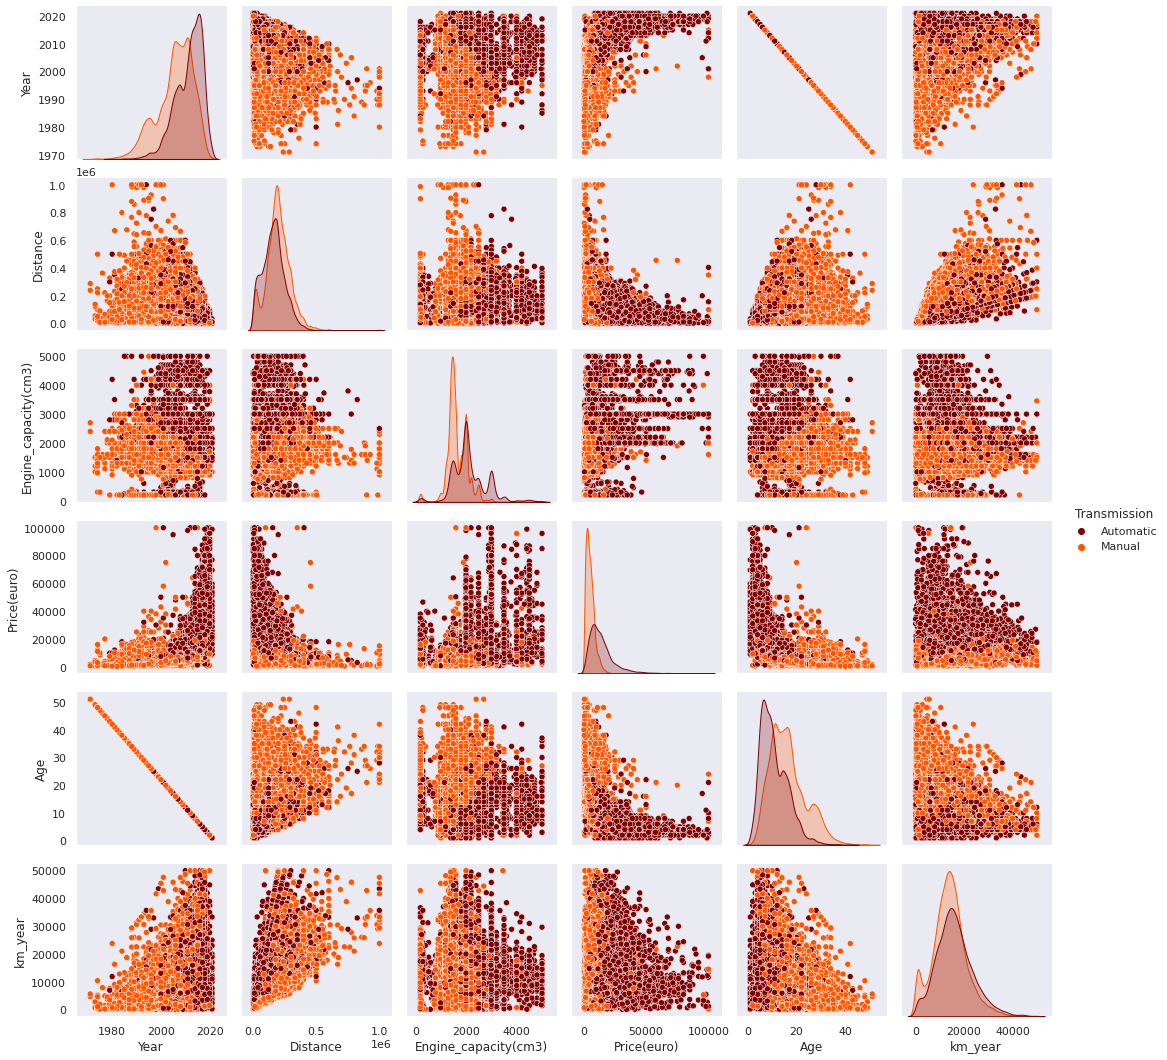

In [8]:
# построим  график зависимости показателей друг от друга
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Transmission',
             palette = 'gist_heat');

На графиках видно, что чем выше возраст автомобиля, тем ниже его цена и объем продаж

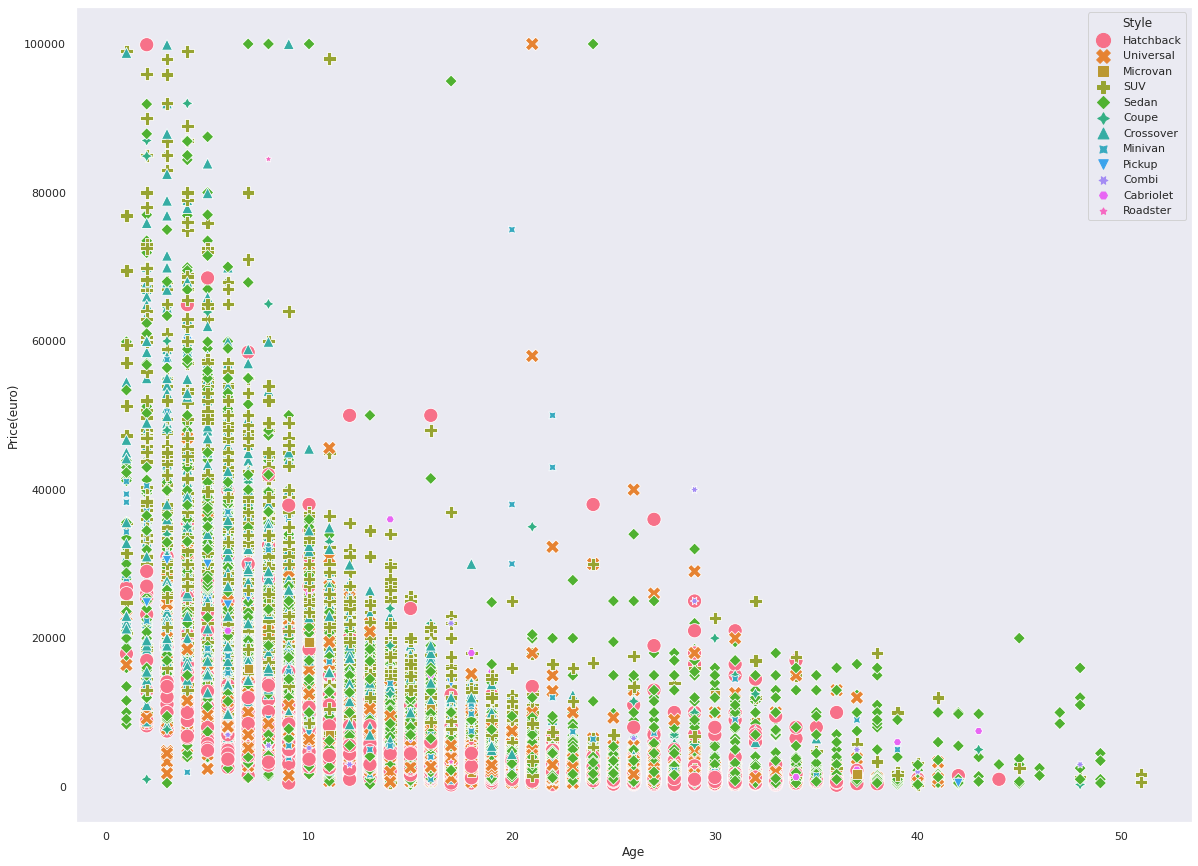

In [10]:
# строим скатерограмму для определения зависимости  между пaрaметрами Price (euro), Age, Style
sns.set_style('dark')
plt.figure(figsize=(20,15))

sns.scatterplot(x ='Age',
             y ='Price(euro)',
             data = df, hue = 'Style', size = 'Style', sizes = (50,200),style='Style')

Из графика видно, что чем старше автомобиль , тем он дешевле. В диапазоне от 40 до 50 лет преобладает Sedan стоимостью менее 20 000 euro. 
На графике присутствуют выбросы:  от 20 до 30 лет Universal, Hatchback

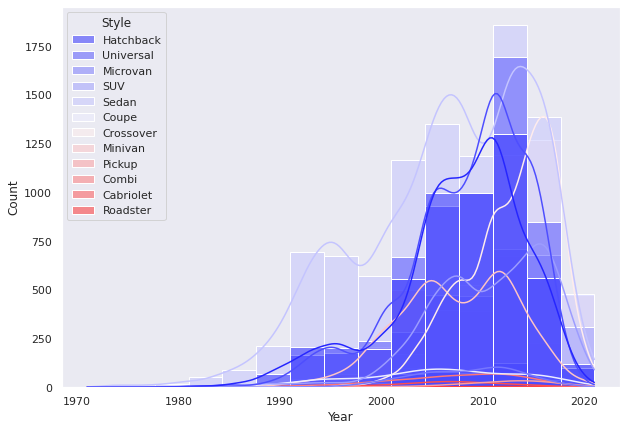

In [11]:
# Построим гистограмму с параметрами тип автомобиля и год выпуска
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Year',
             hue = 'Style',
             bins = 15, kde = True,
             palette='bwr')

Вышеуказанная гистограмма показывает распределение типов атомобилей по годам выпуска. На графике видно, что с течением времени увечиливается количество типов автомобилей и изменяется распределением по типам

# **Добавление в модель дополнительных признаков на основе имеющихся**

Добавим признак 

In [12]:
# рассчитаем среднюю стоимость автомобиля в зависимости от производителя и добавим в отдельный столбец
df['Price_mean_by_Make'] = df.groupby(['Make'])['Price(euro)'].transform('mean')

df


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_mean_by_Make
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,9623.430749
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,6675.596334
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,6675.596334
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,4221.990680
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,13012.050083
...,...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,6877.247736
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,22799.666667
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,5324.886161
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,5190.179954


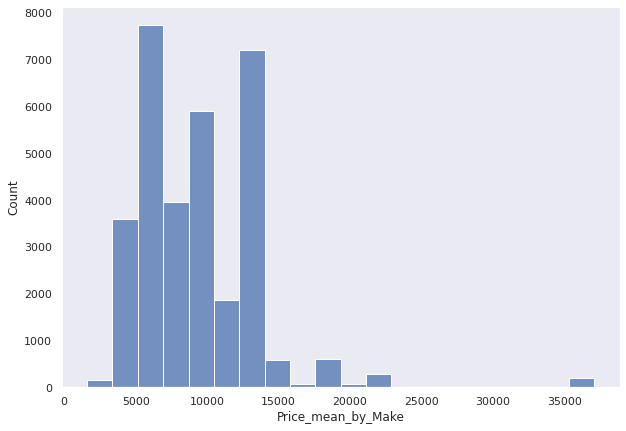

In [23]:
# посмотроим график нового параметра
plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='Price_mean_by_Make', bins = 20);

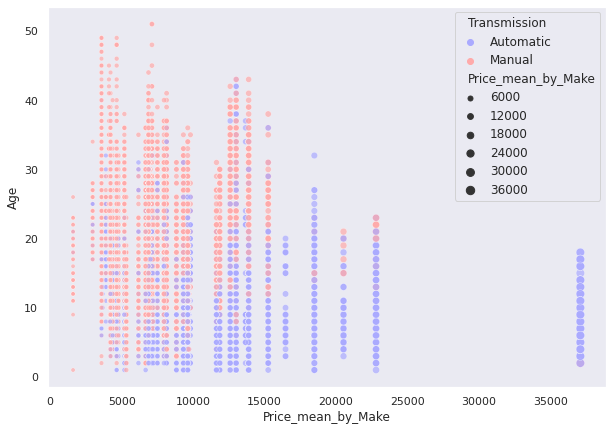

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Price_mean_by_Make", y= "Age",
    hue="Transmission", 
    size = "Price_mean_by_Make", alpha = 0.7,
             palette='bwr'
    );

In [13]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Price_mean_by_Make
count,32220.000000,32220.000000,32220.000000,32220.000000,32220.000000,32220.000000,32220.000000
mean,2008.293172,182513.687430,1868.610273,9454.779733,13.706828,14954.229373,9454.779733
std,7.189603,96805.552427,609.781322,9519.612235,7.189603,7337.012277,4254.240759
min,1971.000000,100.000000,200.000000,200.000000,1.000000,100.000000,1598.841270
25%,2005.000000,123000.000000,1500.000000,3599.000000,8.000000,10271.827206,6875.368421
50%,2010.000000,180000.000000,1800.000000,6730.500000,12.000000,14461.538462,8831.359538
75%,2014.000000,237000.000000,2000.000000,12000.000000,17.000000,18888.888889,12590.721216
max,2021.000000,1000000.000000,5000.000000,100000.000000,51.000000,50000.000000,37094.994737


Новый признак средняя стоимость автомобиля в зависимости от производителя позволяет сравнивать текущую стоимость автомобиля со средней стоимостью автомобилей производителя

Посмотрим на корреляцию численных столбцов

In [24]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Price_mean_by_Make
Year,1.000000,-0.434240,-0.025886,0.551517,-1.000000,0.425819,0.120815
Distance,-0.434240,1.000000,0.067473,-0.347328,0.434240,0.462784,-0.005708
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,0.025886,-0.010412,0.485699
Price(euro),0.551517,-0.347328,0.382841,1.000000,-0.551517,0.156816,0.446892
Age,-1.000000,0.434240,0.025886,-0.551517,1.000000,-0.425819,-0.120815
km_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000,0.053171
Price_mean_by_Make,0.120815,-0.005708,0.485699,0.446892,-0.120815,0.053171,1.000000


In [27]:
# определим категорию популярности автомобилю
# добавим столбец с расчетом количества автомобилей производителя к общему количеству автомобилей
df["Рopularity categories"] = df.groupby("Make")["Make"].transform('count')/df['Make'].count()*100
# разделим автомобили на категории
def f(row):
  if row['Рopularity categories'] < 1:
    val = 'Редкий'
  elif row['Рopularity categories'] < 5:
      val = 'Повседневный'
  else :
        val = 'Популярный'
  return val
# выведем категории автомобилей в новый столбец  
df['Рopularity categories_level'] = df.apply (f, axis=1)
df


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_mean_by_Make,Рopularity categories,Рopularity categories_level
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,9623.430749,9.568591,Популярный
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,6675.596334,7.281192,Популярный
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,6675.596334,7.281192,Популярный
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,4221.990680,5.661080,Популярный
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,13012.050083,9.357542,Популярный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,6877.247736,10.623836,Популярный
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,22799.666667,0.884544,Редкий
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,5324.886161,4.171322,Повседневный
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,5190.179954,1.362508,Повседневный


In [51]:
# присовим категорию стоимости автомобиля
# добавим столбец с расчетом средней стоимости автомобиля производителя к максимальной средней стоимости

df["Percent_of_Price_mean_by_Make"]=df.groupby(['Make'])['Price(euro)'].transform('mean')/df['Price_mean_by_Make'].max()*100
# разделим автомобили  по уровню средней цены
def f(row):
  if row['Percent_of_Price_mean_by_Make'] < 25:
    val = 'Дешевый'
  elif row['Percent_of_Price_mean_by_Make'] < 50:
      val = 'Средний уровень цен'
  else :
        val = 'Дорогой'
  return val
# выведем категории автомобилей по стоимости в новый столбец  
df['Price_mean_by_Make_level'] = df.apply (f, axis=1)
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_mean_by_Make,Рopularity categories,Рopularity categories_level,Percent_of_Price_mean_by_Make,Price_mean_by_Make_level
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,9623.430749,9.568591,Популярный,25.942666,Средний уровень цен
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,6675.596334,7.281192,Популярный,17.995949,Дешевый
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,6675.596334,7.281192,Популярный,17.995949,Дешевый
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,4221.990680,5.661080,Популярный,11.381564,Дешевый
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,13012.050083,9.357542,Популярный,35.077644,Средний уровень цен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,6877.247736,10.623836,Популярный,18.539557,Дешевый
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,22799.666667,0.884544,Редкий,61.462919,Дорогой
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,5324.886161,4.171322,Повседневный,14.354730,Дешевый
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,5190.179954,1.362508,Повседневный,13.991591,Дешевый


Выведим категории автомобилей по популярности и уровню цены в общу таблицу

In [41]:
df.groupby(['Make','Price_mean_by_Make_level','Рopularity categories_level'])['Make','Price_mean_by_Make_level','Рopularity categories_level'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,,Make,Price_mean_by_Make_level,Рopularity categories_level
Make,Price_mean_by_Make_level,Рopularity categories_level,,,
Alfa Romeo,Дешевый,Редкий,38,38,38
Audi,Средний уровень цен,Повседневный,1546,1546,1546
BMW,Средний уровень цен,Популярный,2594,2594,2594
Chevrolet,Дешевый,Редкий,322,322,322
Chrysler,Дешевый,Редкий,83,83,83
Citroen,Дешевый,Редкий,295,295,295
Dacia,Дешевый,Повседневный,1344,1344,1344
Daewoo,Дешевый,Редкий,63,63,63
Daihatsu,Дешевый,Редкий,25,25,25


Выведем списом автомобилей с категорией "Дешевый Повседневный"

In [52]:
print(df.loc[(df['Price_mean_by_Make_level']=='Дешевый')& (df['Рopularity categories_level']=='Повседневный'),'Make'].unique())

['Nissan' 'Dacia' 'Peugeot' 'Ford' 'Vaz' 'Mazda' 'Mitsubishi']


Выведем списом автомобилей с категорией "Дешевый Популярный"

In [53]:
print(df.loc[(df['Price_mean_by_Make_level']=='Дешевый')& (df['Рopularity categories_level']=='Популярный'),'Make'].unique())

['Renault' 'Opel' 'Volkswagen' 'Skoda']


Выведем списом автомобилей с категорией "Дешевый Редкий"

In [54]:
print(df.loc[(df['Price_mean_by_Make_level']=='Дешевый')& (df['Рopularity categories_level']=='Редкий'),'Make'].unique())

['GAZ' 'Rare' 'Dodge' 'Chevrolet' 'Citroen' 'Seat' 'Fiat' 'Suzuki'
 'Daewoo' 'Subaru' 'Rover' 'Chrysler' 'Smart' 'Moskvich / Izh'
 'Alfa Romeo' 'Daihatsu' 'Ssangyong']


Выведем списом автомобилей с категорией "Дорогой Редкий"

In [55]:
print(df.loc[(df['Price_mean_by_Make_level']=='Дорогой')& (df['Рopularity categories_level']=='Редкий'),'Make'].unique())

['Porsche' 'Jaguar' 'Land Rover']


Выведем списом автомобилей с категорией "Средний уровень цен Повседневный"

In [56]:
print(df.loc[(df['Price_mean_by_Make_level']=='Средний уровень цен')& (df['Рopularity categories_level']=='Повседневный'),'Make'].unique())

['Volvo' 'Hyundai' 'Audi' 'Lexus' 'Honda' 'KIA']


Выведем списом автомобилей с категорией "Средний уровень цен Популярный"

In [48]:
print(df.loc[(df['Price_mean_by_Make_level']=='Средний уровень цен')& (df['Рopularity categories_level']=='Популярный'),'Make'].unique())

['Toyota' 'Mercedes' 'BMW']


Выведем списом автомобилей с категорией "Средний уровень цен Редкий"

In [58]:
print(df.loc[(df['Price_mean_by_Make_level']=='Средний уровень цен')& (df['Рopularity categories_level']=='Редкий'),'Make'].unique())

['Lincoln' 'Infiniti' 'Mini' 'Jeep']


In [57]:
df.groupby(['Make','Price_mean_by_Make_level','Рopularity categories_level'])['Make','Price_mean_by_Make_level','Рopularity categories_level'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,,Make,Price_mean_by_Make_level,Рopularity categories_level
Make,Price_mean_by_Make_level,Рopularity categories_level,,,
Alfa Romeo,Дешевый,Редкий,38,38,38
Audi,Средний уровень цен,Повседневный,1546,1546,1546
BMW,Средний уровень цен,Популярный,2594,2594,2594
Chevrolet,Дешевый,Редкий,322,322,322
Chrysler,Дешевый,Редкий,83,83,83
Citroen,Дешевый,Редкий,295,295,295
Dacia,Дешевый,Повседневный,1344,1344,1344
Daewoo,Дешевый,Редкий,63,63,63
Daihatsu,Дешевый,Редкий,25,25,25


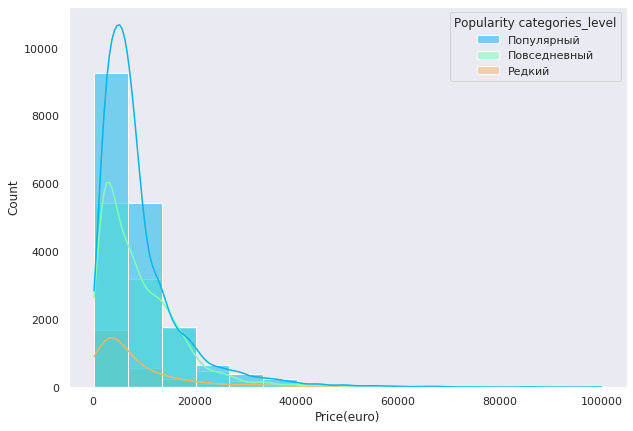

In [65]:
# Построим гистограмму стоимости автомобилей по категориям популярности
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Рopularity categories_level',
             bins = 15, kde = True,
             palette='rainbow')

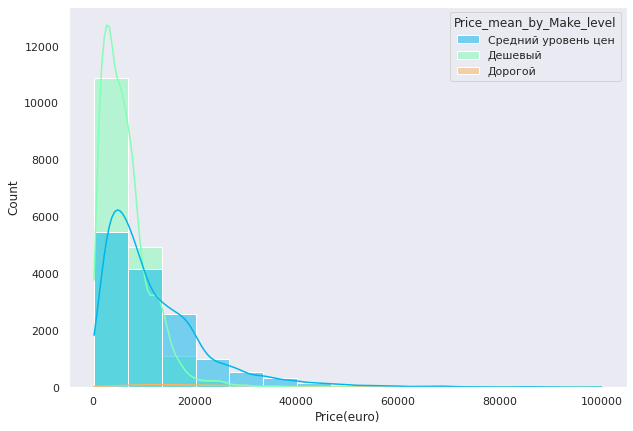

In [67]:
# Построим гистограмму стоимости автомобилей по категориям средней стоимости автомобиля
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Price_mean_by_Make_level',
             bins = 15, kde = True,
             palette='rainbow')

Анализ популярности автомобиля  показал, что на уровень продаж автомобиля оказывает влияние стоимость 

# **Предварительная обработка данных**

## Методы предварительной обработки данных

Нормализация

In [68]:
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

Стандартизация

In [69]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

Логарифмирование и стандартизация

In [70]:
df_power  = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])
M = df_power[num_columns].mean()
STD = df_power[num_columns].std()
df_power[num_columns] = (df_power[num_columns]-M)/STD

Приведение категориальных признаков к численным

In [71]:
# Бинарные признаки
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

In [72]:
# Кодирование многозначных признаков

df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Make                           32220 non-null  int8   
 1   Model                          32220 non-null  int16  
 2   Year                           32220 non-null  int64  
 3   Style                          32220 non-null  int8   
 4   Distance                       32220 non-null  float64
 5   Engine_capacity(cm3)           32220 non-null  float64
 6   Fuel_type                      32220 non-null  int8   
 7   Transmission                   32220 non-null  int8   
 8   Price(euro)                    32220 non-null  float64
 9   Age                            32220 non-null  int64  
 10  km_year                        32220 non-null  float64
 11  Price_mean_by_Make             32220 non-null  float64
 12  Рopularity categories          32220 non-null 

In [73]:
df_se.sample(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_mean_by_Make,Рopularity categories,Рopularity categories_level,Percent_of_Price_mean_by_Make,Price_mean_by_Make_level
11591,11,101,2019,2,38444.0,2300.0,4,1,26999.0,3,12814.666667,8143.718541,4.168218,Повседневный,21.953686,Дешевый
31907,11,52,2016,11,186000.0,1499.0,0,0,8100.0,6,31000.000000,8143.718541,4.168218,Повседневный,21.953686,Дешевый
5561,38,101,1998,10,200000.0,1600.0,3,1,1800.0,24,8333.333333,7013.720000,0.465549,Редкий,18.907457,Дешевый
19023,14,107,2006,3,212500.0,2200.0,0,1,9000.0,16,13281.250000,11863.198191,3.774053,Повседневный,31.980590,Средний уровень цен
30620,1,17,2017,10,12600.0,1968.0,0,1,35000.0,5,2520.000000,12590.721216,4.798262,Повседневный,33.941833,Средний уровень цен
2418,27,95,2017,3,141200.0,1500.0,0,0,13990.0,5,28240.000000,7967.774760,3.885785,Повседневный,21.479380,Дешевый
4972,15,101,2014,9,115000.0,2498.0,2,1,20900.0,8,14375.000000,16465.731343,0.207945,Редкий,44.388014,Средний уровень цен
5702,42,37,1999,6,350000.0,1900.0,0,0,1900.0,23,15217.391304,6877.247736,10.623836,Популярный,18.539557,Дешевый
3036,42,120,1991,11,407000.0,1900.0,0,0,3600.0,31,13129.032258,6877.247736,10.623836,Популярный,18.539557,Дешевый
25060,28,43,2000,6,100000.0,1700.0,0,0,12000.0,22,4545.454545,4221.990680,5.661080,Популярный,11.381564,Дешевый


One-hot кодирование многозначных признаков

In [74]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.sample(5)

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,Price_mean_by_Make,Рopularity categories,Percent_of_Price_mean_by_Make,...,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Рopularity categories_level_Повседневный,Рopularity categories_level_Популярный,Рopularity categories_level_Редкий,Price_mean_by_Make_level_Дешевый,Price_mean_by_Make_level_Дорогой,Price_mean_by_Make_level_Средний уровень цен
2608,2009,189000.0,1400.0,1,6490.0,13,14538.461538,8831.359538,5.369336,23.807416,...,0,0,1,0,0,1,0,1,0,0
22794,2006,340000.0,3000.0,1,4200.0,16,21250.000000,13012.050083,9.357542,35.077644,...,0,0,0,0,0,1,0,0,0,1
1719,2012,170000.0,1400.0,1,7999.0,10,17000.000000,6877.247736,10.623836,18.539557,...,0,0,1,0,0,1,0,1,0,0
18524,2007,150000.0,2000.0,0,2000.0,15,10000.000000,13012.050083,9.357542,35.077644,...,0,0,0,0,0,1,0,0,0,1
22631,2006,158888.0,1400.0,0,2200.0,16,9930.500000,4774.744770,0.741775,12.871669,...,0,0,0,0,0,0,1,1,0,0


In [75]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 214 entries, Year to Price_mean_by_Make_level_Средний уровень цен
dtypes: float64(7), int64(3), uint8(204)
memory usage: 8.7 MB


## Сохранение DataFrame в файл

Метод .to_csv(path, index) 

In [76]:
# сохранение результатов разных методов предварительной обработки в файлы
df_norm.to_csv('/content/cars_moldova_norm.csv',index=False)
df_scaled.to_csv('/content/cars_moldova_scaled.csv',index=False)
df_power.to_csv('/content/cars_moldova_power.csv',index=False)
df_se.to_csv('/content/cars_moldova_se.csv',index=False)
df_ohe.to_csv('/content/cars_ohe_se.csv',index=False)